In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram equalization

$s = (L - 1) \sum\limits_{j=0}^{k} p_r(r_j)$

In [156]:
def histogram_equalize(img):
    hist, bins = np.histogram(img.flatten(), 256, (0, 256))

    cdf = hist.cumsum()
    T = 255 * cdf / cdf[-1]

    eqz = np.interp(img.flatten(), bins[:-1], T)

    return eqz.reshape(img.shape)

In [157]:
def plot_sideways_with_histogram(original, equalized):
    fig, axes = plt.subplots(nrows=2, ncols=2)

    for ax in axes.flat:
        ax.axis('off')

    axes[0, 0].set_title('Original')
    axes[0, 0].imshow(original, cmap='grey')
    axes[1, 0].hist(original.flatten(), 256, [0,256], color='r')

    axes[0, 1].set_title('Equalized')
    axes[0, 1].imshow(equalized, cmap='grey')
    axes[1, 1].hist(equalized.flatten(), 256, [0, 256], color='r')

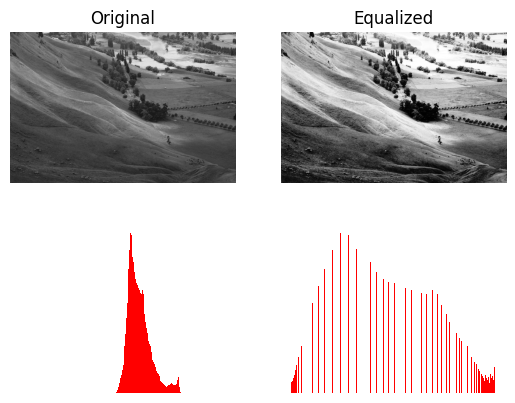

In [158]:
img = cv2.imread('data/unequalized.jpg', 0)
eqz = histogram_equalize(img)
plot_sideways_with_histogram(img, eqz)

### Histogram matching

Take an input pixel r. Ask yourself what the percentile of r is (in the source image's histogram). What value has the same percentile in the reference image? That will be z.

$z = G^{-1}[T(r)]$ <br>
where $T(r)$ and $G(z)$ are the histogram-equalization function for the source image and reference image respectively.

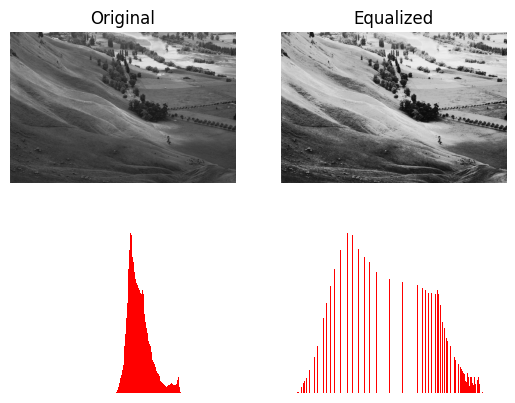

In [159]:
from skimage.exposure import match_histograms

roger = cv2.imread('data/roger.jpg', 0)
matched = match_histograms(img, roger)
plot_sideways_with_histogram(img, matched)

### Resizing and cropping

In [160]:
def plot_sideways(*images):
    fig, axes = plt.subplots(ncols=len(images))
    
    for i, image in enumerate(images):
        axes[i].imshow(image, cmap='grey')
        axes[i].axis('off')

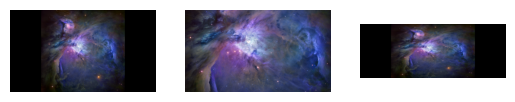

In [177]:
orion = cv2.imread('data/orion.png', 1)
cropped = orion[180: 540, 320: 960]
resized = cv2.resize(orion, (480, 180))

plot_sideways(orion, cropped, resized)

### Gaussian blur

Compute the kernel with the 2-D Gaussian function.

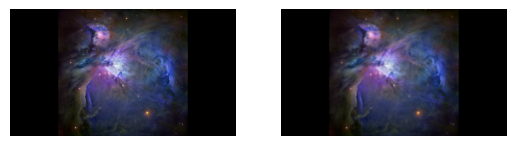

In [222]:
blur = cv2.GaussianBlur(orion, (11, 11), 0) # last parameter is sigma, passed as 0 for auto-compute
plot_sideways(orion, blur)

### Image sharpening

$\nabla^2 f = f(x + 1, y) + f(x - 1, y) + f(x, y + 1) + f(x, y - 1) - 4 f(x, y)$

$g(x, y) = f(x, y) + c [\nabla^2 f(x, y)]$


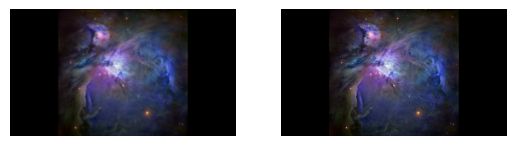

In [223]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharp = cv2.filter2D(blur, -1, kernel)
plot_sideways(blur, sharp)